# Chapter 17: Model Selection and Cross Validation
## Exercises solutions

The dataset used in this chapter os the *Iris dataset* and can be imported with the Sklearn laod_iris() function.

In [21]:
# import all the modules
import sklearn
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import time

Load the dataset and show its attributes:

In [22]:
# load the dataset
iris = load_iris() 
# we can see that this dataset is a class 
print(f'Dataset type: \n{type(iris)}\n')
# and it has some functions and attributes that describe it
print(f'Dataset attributes: \n{iris.keys()}\n')
# these are our features (X)
print(f'Feaures names: \n{iris.feature_names}\n')
# these are the targets/labels (y)
print(f'Target names: \n{iris.target_names}\n')
# number of samples
print(f'Number of samples: \n{len(iris.data)}\n')

Dataset type: 
<class 'sklearn.utils.Bunch'>

Dataset attributes: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Feaures names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names: 
['setosa' 'versicolor' 'virginica']

Number of samples: 
150



## Exercise 1
Implement the model selection and HP tuning as above for the iris dataset.

Our question now is, whether to use KNN or a Decision Tree (DT) classifier. We start by training both models on our training set and calculate the performance on the test set. <br>
We start off by splitting our data in train and test sets:

In [23]:
# import the function to split the data in train and test set
from sklearn.model_selection import train_test_split

# set the seed to promote the reproducibility of the results (it controls the randomness in the splits in this case)
seed = 0

# assign features and targets to X and y
X = iris.data
y = iris.target

# split features and targets in train and test sets (). Note how we can easily stratify the sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = seed, stratify = y)

print(f'Number of features in the training set: {len(X_train)}')
print(f'Number of targets in the training set: {len(y_train)}')
print(f'Number of features in the test set: {len(X_test)}')
print(f'Number of targtes in the test set: {len(y_test)}')

Number of features in the training set: 105
Number of targets in the training set: 105
Number of features in the test set: 45
Number of targtes in the test set: 45


We train both classifiers and check their accuracy on training and test sets:

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# train both classifiers
dtc = DecisionTreeClassifier(max_depth=5,random_state=0)
dtc.fit(X_train,y_train)

#knn = KNeighborsClassifier(n_neighbors=1)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# helper functions to calculate the accuracy values on train and test set. 
def accuracy(X,y,predictor):
    return np.sum(np.equal(predictor.predict(X),y))/len(X)

def trainValTestAcc(predictor):
    vals = {}
    vals['train'] = accuracy(X_train,y_train,predictor)
    vals['test'] = accuracy(X_test,y_test,predictor)
    return vals

print(" DT: ",trainValTestAcc(dtc))
print("KNN: ",trainValTestAcc(knn))

 DT:  {'train': 1.0, 'test': 0.9777777777777777}
KNN:  {'train': 0.9619047619047619, 'test': 1.0}


*Sklearn* offers some convenient functions to measure the models' metrics. Above we illustrated how to build our own helper function (sometimes we will need that!), below an alternative ready-to-go:

In [25]:
# import the function to measure the models'accuracy 
from sklearn.metrics import accuracy_score

# calculate the accuracy of both models on train and test sets.
dt_train = accuracy_score(y_train, dtc.predict(X_train))
dt_test = accuracy_score(y_test, dtc.predict(X_test))
knn_train = accuracy_score(y_train, knn.predict(X_train))
knn_test = accuracy_score(y_test, knn.predict(X_test))

# print the results (matching the previous ones as expected)
print(f" DT train: {dt_train},  DT test: {dt_test}")
print(f"KNN train: {knn_train}, KNN test: {knn_test}")


 DT train: 1.0,  DT test: 0.9777777777777777
KNN train: 0.9619047619047619, KNN test: 1.0


Both models do extremely well on train and test set, with the KNN performing better on the unseen data. <br>

- vary the n_neighbors parameter for KNN:

In [47]:
#knn = KNeighborsClassifier
neighbors = np.arange(1, 10)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    print(f"KNN_{n}: {trainValTestAcc(knn)}")

KNN_1: {'train': 1.0, 'test': 0.9777777777777777}
KNN_2: {'train': 0.9619047619047619, 'test': 0.9333333333333333}
KNN_3: {'train': 0.9428571428571428, 'test': 1.0}
KNN_4: {'train': 0.9619047619047619, 'test': 1.0}
KNN_5: {'train': 0.9619047619047619, 'test': 1.0}
KNN_6: {'train': 0.9523809523809523, 'test': 1.0}
KNN_7: {'train': 0.9523809523809523, 'test': 1.0}
KNN_8: {'train': 0.9523809523809523, 'test': 1.0}
KNN_9: {'train': 0.9714285714285714, 'test': 1.0}


- plot the validation curve:

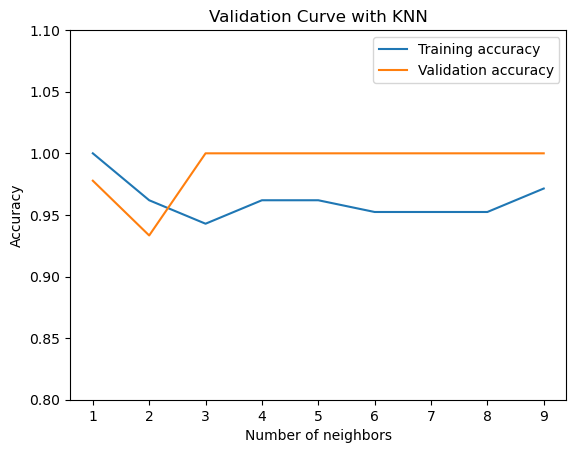

In [51]:
# these two lists will store our results 
train_scores = []; val_scores = []

# test the KNN at different number of neighbors and append the results to the above lists
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    train_scores.append(accuracy_score(y_train, knn.predict(X_train)))
    val_scores.append(accuracy_score(y_test, knn.predict(X_test)))

# plot the training and validation curves 
plt.title("Validation Curve with KNN")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.1)
plt.plot(neighbors, train_scores, label="Training accuracy")
plt.plot(neighbors, val_scores, label="Validation accuracy")
plt.legend(loc="best")
plt.show()

## Exercises 2 
Implement nested cross-validation for tuning the max_depth of the decision tree on wine dataset. 

We start-off by importing the wine dataset:

In [27]:
from sklearn.datasets import load_wine
dataset = load_wine()

# we can see that this dataset is a class 
print(f'Dataset type: \n{type(dataset)}\n')
# and it has some functions and attributes that describe it
print(f'Dataset attributes: \n{dataset.keys()}\n')
# these are our features (X)
print(f'Feaures names: \n{dataset.feature_names}\n')
# these are the targets/labels (y)
print(f'Target names: \n{dataset.target_names}\n')
# number of samples
print(f'Number of samples: \n{len(dataset.data)}\n')

Dataset type: 
<class 'sklearn.utils.Bunch'>

Dataset attributes: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

Feaures names: 
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target names: 
['class_0' 'class_1' 'class_2']

Number of samples: 
178



We store the features and targets in two variables and create the training, validation and test sets:

In [28]:
# store features and targets 
X = dataset.data
y = dataset.target

# create the training and test sets 
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=seed)

print(f'Number of features in the training set: {len(X_train)}')
print(f'Number of targets in the training set: {len(y_train)}')
print(f'Number of features in the test set: {len(X_test)}')
print(f'Number of targtes in the test set: {len(y_test)}')

Number of features in the training set: 124
Number of targets in the training set: 124
Number of features in the test set: 54
Number of targtes in the test set: 54


In [44]:
# import the module to run nested cross validation
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

# we store all the scores here (useful for the next exercise)
nested_scores = [] 
# we store all the mean score here 
nested_scores_mean = [] 

# set the range of values for our hyperparameter
md = np.arange(1, 10)

# test the KNN at different number of neighbors and append the results to the above lists
for d in md:
    dtc = DecisionTreeClassifier(max_depth = d, random_state = 0)
    nested_score = cross_val_score(dtc, dataset.data, dataset.target, cv = 5)
    print(f'Nested scores at maximum depth = {d}: \n{nested_score}')
    nested_scores.append(nested_score)
    nested_scores_mean.append(nested_score.mean())

Nested scores at maximum depth = 1: 
[0.52777778 0.66666667 0.69444444 0.6        0.74285714]
Nested scores at maximum depth = 2: 
[0.80555556 0.80555556 0.77777778 0.74285714 0.97142857]
Nested scores at maximum depth = 3: 
[0.94444444 0.83333333 0.91666667 0.8        0.97142857]
Nested scores at maximum depth = 4: 
[0.94444444 0.86111111 0.88888889 0.91428571 0.97142857]
Nested scores at maximum depth = 5: 
[0.94444444 0.83333333 0.88888889 0.91428571 0.85714286]
Nested scores at maximum depth = 6: 
[0.94444444 0.83333333 0.88888889 0.91428571 0.85714286]
Nested scores at maximum depth = 7: 
[0.94444444 0.83333333 0.88888889 0.91428571 0.85714286]
Nested scores at maximum depth = 8: 
[0.94444444 0.83333333 0.88888889 0.91428571 0.85714286]
Nested scores at maximum depth = 9: 
[0.94444444 0.83333333 0.88888889 0.91428571 0.85714286]


Above we note that, since we indicated a 5 fold split (cv = 5) we are now generating 5 scores (one on each fold) for each parameter we are testing; we are essentially scoring our model on 5 subsets of the original dataset. 

Below we plot the results, taking the mean of the five scores at each maximum depth:

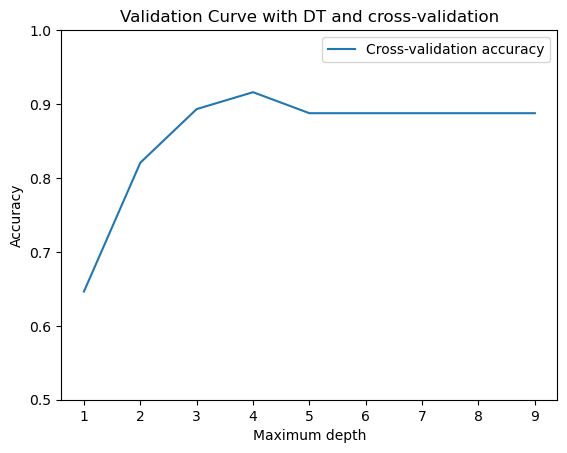

In [45]:
# plot the training and validation curves 
plt.title("Validation Curve with DT and cross-validation")
plt.xlabel("Maximum depth")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1)
plt.plot(md, nested_scores_mean,label="Cross-validation accuracy")
plt.legend(loc="best");

From the above results it would seem that 4 is the optimal *maximum depth* for our classification tree, on this data.

## Exercise 3
Implement a validation curve plot that shows the accuracies plus and minus the standard deviation. 

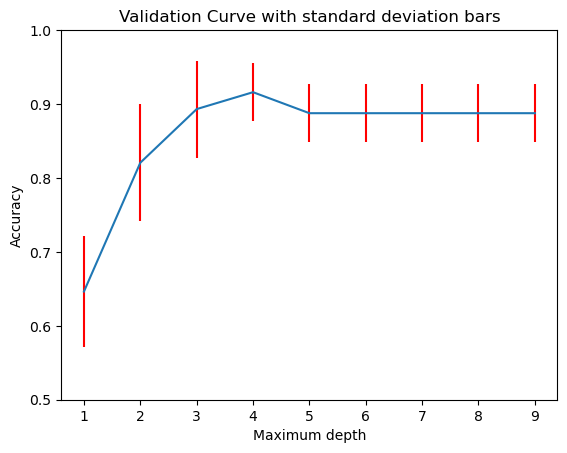

In [68]:
# store the standard deviations in a variable 
sd = np.std(nested_scores, axis = 1)

# plot the validation curve with the standard deviations (red)
plt.errorbar(md, nested_scores_mean, yerr= sd, ecolor= 'red')
plt.title("Validation Curve with standard deviation bars")
plt.xlabel("Maximum depth")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1);

# Exercise 4
Tune a KNN model on the Abalone dataset with the hyperparameters k (number of neighbors), and p (metric exponent). Evaluate the results in a 2-dimensional grid search with cross-validation. Make sure to avoid overfitting and estimate model performance. 

# Exercise 5
Tune a DT to classify web pages in the Website Phishing dataset with the hyperparameters minimum numbers to split a leave, maximum tree depth, minimum number of samples in a leaf. Evaluate the results in a 3-dimensional grid search with cross-validation.  Make sure to avoid overfitting and estimate model performance.  